# 0.) Import the US Perminent Visas using zip extractor

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [3]:
import zipfile

zf = zipfile.ZipFile("/content/gdrive/MyDrive/us_perm_visas.csv.zip") 
df = pd.read_csv(zf.open('us_perm_visas.csv'))

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,1,2,3,4,5,6,7,10,11,16,17,20,21,22,25,26,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42,43,44,45,47,48,49,50,51,52,53,55,56,57,58,59,60,61,63,64,65,66,68,69,70,71,72,73,74,77,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,100,101,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,153) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# 1.) US perm Visas csv from cycle using zip extractor


In [4]:
df.head()

,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,...,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
0,NaN,NaN,NaN,NaN,PERM,A-07323-97014,NaN,NaN,Certified,J-1,...,NaN,NaN,NaN,IT,75629.0,NaN,yr,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,PERM,A-07332-99439,NaN,NaN,Denied,B-2,...,NaN,NaN,NaN,Other Economic Sector,37024.0,NaN,yr,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,PERM,A-07333-99643,NaN,NaN,Certified,H-1B,...,NaN,NaN,NaN,Aerospace,47923.0,NaN,yr,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,PERM,A-07339-01930,NaN,NaN,Certified,B-2,...,NaN,NaN,NaN,Other Economic Sector,10.97,NaN,hr,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,PERM,A-07345-03565,NaN,NaN,Certified,L-1,...,NaN,NaN,NaN,Advanced Mfg,100000.0,NaN,yr,NaN,NaN,NaN


In [5]:
from numpy.lib.shape_base import column_stack
columns=df.columns
for col in columns:
  print(col)

add_these_pw_job_title_9089
agent_city
agent_firm_name
agent_state
application_type
case_no
case_number
case_received_date
case_status
class_of_admission
country_of_citizenship
country_of_citzenship
decision_date
employer_address_1
employer_address_2
employer_city
employer_country
employer_decl_info_title
employer_name
employer_num_employees
employer_phone
employer_phone_ext
employer_postal_code
employer_state
employer_yr_estab
foreign_worker_info_alt_edu_experience
foreign_worker_info_birth_country
foreign_worker_info_city
foreign_worker_info_education
foreign_worker_info_education_other
foreign_worker_info_inst
foreign_worker_info_major
foreign_worker_info_postal_code
foreign_worker_info_rel_occup_exp
foreign_worker_info_req_experience
foreign_worker_info_state
foreign_worker_info_training_comp
foreign_worker_ownership_interest
foreign_worker_yr_rel_edu_completed
fw_info_alt_edu_experience
fw_info_birth_country
fw_info_education_other
fw_info_postal_code
fw_info_rel_occup_exp
fw_info

# 2.) Choose 4 features you think are important. Case_status is your target variable


In [6]:
df_selected=df[["job_info_alt_occ_num_months","wage_offer_from_9089","fw_info_alt_edu_experience","job_info_education","case_status"]]

In [7]:
df_selected

,job_info_alt_occ_num_months,wage_offer_from_9089,fw_info_alt_edu_experience,job_info_education,case_status
0,NaN,75629.0,NaN,NaN,Certified
1,NaN,37024.0,NaN,NaN,Denied
2,NaN,47923.0,NaN,NaN,Certified
3,NaN,10.97,NaN,NaN,Certified
4,NaN,100000.0,NaN,NaN,Certified
...,...,...,...,...,...
374357,NaN,"28,330.00",A,Associate's,Withdrawn
374358,36.0,"122,000.00",Y,Master's,Withdrawn
374359,NaN,"79,082.00",A,Master's,Withdrawn
374360,NaN,"37,981.00",A,None,Withdrawn


# 3.) Clean your data for a decision tree


In [8]:
df_selected.isnull().sum()

job_info_alt_occ_num_months    227162
wage_offer_from_9089           114771
fw_info_alt_edu_experience     223916
job_info_education             135282
case_status                         0
dtype: int64

In [9]:
df_selected=df_selected.dropna()
df_selected

,job_info_alt_occ_num_months,wage_offer_from_9089,fw_info_alt_edu_experience,job_info_education,case_status
223911,24.0,167000.0,A,Master's,Certified-Expired
223915,48.0,207334.0,N,Master's,Certified-Expired
223916,48.0,133245.0,A,Bachelor's,Certified-Expired
223917,24.0,48090.0,A,None,Certified-Expired
223918,60.0,178500.0,A,Master's,Certified-Expired
...,...,...,...,...,...
374352,36.0,"115,000.00",N,Master's,Certified
374353,60.0,"136,219.00",A,Bachelor's,Certified
374354,36.0,"125,000.00",Y,Master's,Withdrawn
374356,36.0,"142,938.00",A,Master's,Withdrawn


In [10]:
dummies_fw = pd.get_dummies(df_selected["fw_info_alt_edu_experience"])
dummies_edu= pd.get_dummies(df_selected["job_info_education"])

In [11]:
data=pd.concat([df_selected,dummies_fw,dummies_edu], axis=1)

In [12]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data["case_status"]= label_encoder.fit_transform(data["case_status"]) 

In [13]:
fdata=data.drop(columns=["fw_info_alt_edu_experience", "job_info_education"])
fdata
#0=Certified-expired
#1=Certified
#2=Denied
#3=Withdrawn

,job_info_alt_occ_num_months,wage_offer_from_9089,case_status,A,N,Y,Associate's,Bachelor's,Doctorate,High School,Master's,None,Other
223911,24.0,167000.0,1,1,0,0,0,0,0,0,1,0,0
223915,48.0,207334.0,1,0,1,0,0,0,0,0,1,0,0
223916,48.0,133245.0,1,1,0,0,0,1,0,0,0,0,0
223917,24.0,48090.0,1,1,0,0,0,0,0,0,0,1,0
223918,60.0,178500.0,1,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
374352,36.0,"115,000.00",0,0,1,0,0,0,0,0,1,0,0
374353,60.0,"136,219.00",0,1,0,0,0,1,0,0,0,0,0
374354,36.0,"125,000.00",3,0,0,1,0,0,0,0,1,0,0
374356,36.0,"142,938.00",3,1,0,0,0,0,0,0,1,0,0


In [14]:
fdata["wage_offer_from_9089"] = fdata["wage_offer_from_9089"].str.replace(",", "").astype(float)

In [15]:
fdata=fdata.dropna()
fdata

,job_info_alt_occ_num_months,wage_offer_from_9089,case_status,A,N,Y,Associate's,Bachelor's,Doctorate,High School,Master's,None,Other
223911,24.0,167000.0,1,1,0,0,0,0,0,0,1,0,0
223915,48.0,207334.0,1,0,1,0,0,0,0,0,1,0,0
223916,48.0,133245.0,1,1,0,0,0,1,0,0,0,0,0
223917,24.0,48090.0,1,1,0,0,0,0,0,0,0,1,0
223918,60.0,178500.0,1,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
374352,36.0,115000.0,0,0,1,0,0,0,0,0,1,0,0
374353,60.0,136219.0,0,1,0,0,0,1,0,0,0,0,0
374354,36.0,125000.0,3,0,0,1,0,0,0,0,1,0,0
374356,36.0,142938.0,3,1,0,0,0,0,0,0,1,0,0


# 4.) Fit and plot a decision tree of depth 3


In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [17]:
X = fdata.drop("case_status", axis=1)
y = fdata["case_status"]

In [18]:
clf=tree.DecisionTreeClassifier(max_depth=3)
clf=clf.fit(X,y)

[Text(0.5, 0.875, 'wage_offer_from_9089 <= 22.125\ngini = 0.181\nsamples = 17863\nvalue = [16134, 770, 502, 457]'),
 Text(0.25, 0.625, 'job_info_alt_occ_num_months <= 18.0\ngini = 0.476\nsamples = 34\nvalue = [11, 1, 22, 0]'),
 Text(0.125, 0.375, 'wage_offer_from_9089 <= 15.225\ngini = 0.537\nsamples = 18\nvalue = [10, 1, 7, 0]'),
 Text(0.0625, 0.125, 'gini = 0.556\nsamples = 13\nvalue = [5, 1, 7, 0]'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 5\nvalue = [5, 0, 0, 0]'),
 Text(0.375, 0.375, "Master's <= 0.5\ngini = 0.117\nsamples = 16\nvalue = [1, 0, 15, 0]"),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 15\nvalue = [0, 0, 15, 0]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0]'),
 Text(0.75, 0.625, 'None <= 0.5\ngini = 0.179\nsamples = 17829\nvalue = [16123, 769, 480, 457]'),
 Text(0.625, 0.375, 'wage_offer_from_9089 <= 81201.5\ngini = 0.173\nsamples = 17277\nvalue = [15686, 747, 419, 425]'),
 Text(0.5625, 0.125, 'gini = 0.237\nsamples = 2899\nvalue = [2522, 142

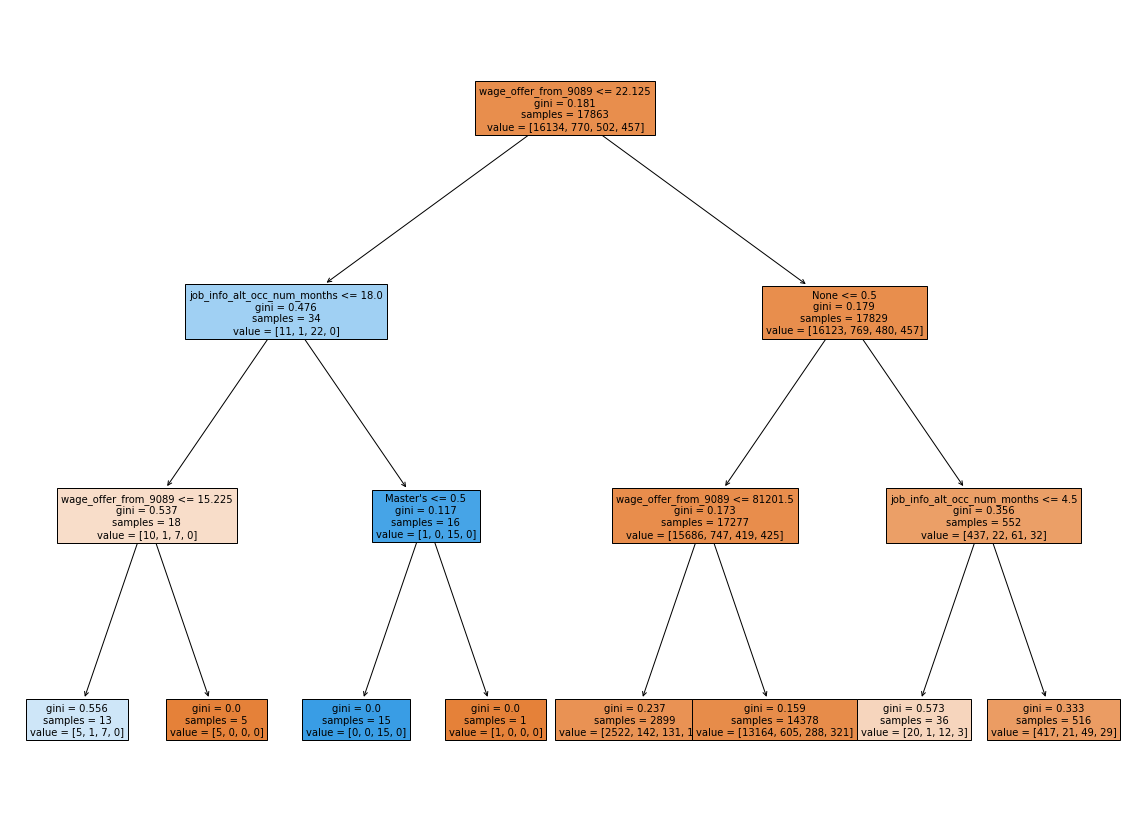

In [19]:
plt.figure(figsize=(20,15))
tree.plot_tree(clf,max_depth=3,filled=True,fontsize=10,feature_names=X.columns)

# 5.) Write your interpretation of the largest (by sample size) leaf node


The leaf node wage<=22.125 & none<=0.5 seems to be the largest node. The size of the largest leaf node is an indication of how important that group of samples is for the overall decision tree. If the largest leaf node is very large, it means that there is a significant portion of the dataset that is similar in terms of the features used to split the data. On the other hand, if the largest leaf node is small, it means that the samples in the dataset are more diverse and there isn't a significant portion of similar samples.

# 6.) Using a for loop, make your own train-test split and determine the best max_depth for out-of sample accuracy

In [20]:
max_depth=[1,2,3]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [22]:
from sklearn.metrics import mean_squared_error
y_pred = clf.predict(X_test)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))

In [23]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [25]:
from sklearn.metrics import accuracy_score
accuracies = []
for max_depth in range(1, 20):
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    accuracies.append(accuracy)

best_max_depth = np.argmax(accuracies) + 1

print("Best max_depth:", best_max_depth)
print("Best accuracy:", np.max(accuracies))

Best max_depth: 5
Best accuracy: 0.9070808844108592
